![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import sklearn.metrics as metrics
from utils import evaluate
from sklearn.preprocessing import OrdinalEncoder

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [2]:
# code here to prepare your data
df = pd.read_csv('../../data/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df['sqft_living'].max()

13540

In [4]:
#Show the age of the home instead of the year it was built so we can see how the age 
# of the home may affect the price. 
home_age = []
for i in df['yr_built']: 
    home_age.append(2021-i)


In [5]:
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [6]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [7]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [8]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
train_df.head()


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6465,4139480190,9/16/2014,3,3.25,3780,10623,1.0,NO,FAIR,Average,...,2650,1130.0,1999,0.0,98006,47.5506,-122.101,3850,11170,1150000.0
10332,1172000135,7/31/2014,4,2.00,1940,6350,1.0,NO,NONE,Good,...,970,970.0,1951,NaN,98103,47.6948,-122.357,960,6350,446000.0
17878,7454001210,6/3/2014,3,1.00,1040,6860,2.0,NO,NONE,Average,...,1040,0.0,1942,NaN,98146,47.5121,-122.375,1030,6512,239000.0
18830,686530530,8/4/2014,5,1.75,2510,9750,1.5,NO,NONE,Average,...,2510,0.0,1969,NaN,98052,47.6635,-122.149,1900,9750,570000.0
12147,5095401360,11/21/2014,3,2.50,2080,16050,1.0,NO,NONE,Very Good,...,1360,720.0,1978,0.0,98059,47.4694,-122.069,1790,14550,418000.0


In [9]:
train_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.700481
sqft_above       0.602156
sqft_living15    0.586176
bathrooms        0.526186
lat              0.307136
bedrooms         0.302600
floors           0.257098
yr_renovated     0.134394
sqft_lot         0.092576
sqft_lot15       0.082877
yr_built         0.053602
long             0.022320
id              -0.017423
zipcode         -0.050696
Name: price, dtype: float64

In [10]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6465,4139480190,9/16/2014,3,3.25,3780,10623,1.0,NO,FAIR,Average,11 Excellent,2650,1130.0,1999,0.0,98006,47.5506,-122.101,3850,11170
10332,1172000135,7/31/2014,4,2.00,1940,6350,1.0,NO,NONE,Good,7 Average,970,970.0,1951,NaN,98103,47.6948,-122.357,960,6350
17878,7454001210,6/3/2014,3,1.00,1040,6860,2.0,NO,NONE,Average,6 Low Average,1040,0.0,1942,NaN,98146,47.5121,-122.375,1030,6512
18830,686530530,8/4/2014,5,1.75,2510,9750,1.5,NO,NONE,Average,8 Good,2510,0.0,1969,NaN,98052,47.6635,-122.149,1900,9750
12147,5095401360,11/21/2014,3,2.50,2080,16050,1.0,NO,NONE,Very Good,8 Good,1360,720.0,1978,0.0,98059,47.4694,-122.069,1790,14550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14565,871001484,1/15/2015,3,1.75,1800,5816,1.0,NO,NONE,Very Good,7 Average,900,900.0,1947,0.0,98199,47.6529,-122.407,1650,5816
15649,6123600285,11/7/2014,3,1.50,1010,7755,1.0,NaN,NONE,Average,6 Low Average,1010,0.0,1953,0.0,98148,47.4238,-122.332,1270,8350
10123,8078440140,10/9/2014,3,2.50,2130,7199,2.0,NO,NONE,Average,8 Good,2130,0.0,1990,0.0,98074,47.6331,-122.027,1890,7546
5600,3925000020,2/24/2015,3,2.00,1690,9516,1.0,NaN,NONE,Average,7 Average,1690,0.0,1997,0.0,98022,47.2132,-122.001,1850,9516


In [11]:
simple_model_X_train = X_train[['sqft_living', 'sqft_living15', 'sqft_above',
                   'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_lot15']]
simple_model_X_train

,sqft_living,sqft_living15,sqft_above,bathrooms,bedrooms,floors,sqft_lot,sqft_lot15
6465,3780,3850,2650,3.25,3,1.0,10623,11170
10332,1940,960,970,2.00,4,1.0,6350,6350
17878,1040,1030,1040,1.00,3,2.0,6860,6512
18830,2510,1900,2510,1.75,5,1.5,9750,9750
12147,2080,1790,1360,2.50,3,1.0,16050,14550
...,...,...,...,...,...,...,...,...
14565,1800,1650,900,1.75,3,1.0,5816,5816
15649,1010,1270,1010,1.50,3,1.0,7755,8350
10123,2130,1890,2130,2.50,3,2.0,7199,7546
5600,1690,1850,1690,2.00,3,1.0,9516,9516


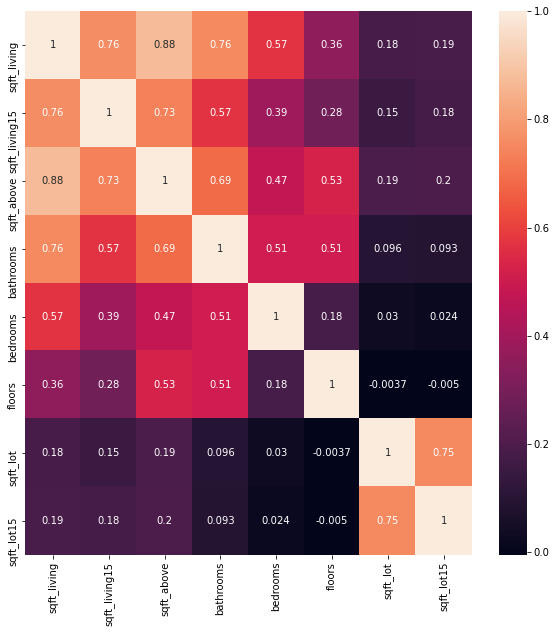

In [12]:
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.heatmap(simple_model_X_train.corr(), annot=True);

In [13]:
# select the features for modeling our simple baseline
simple_model_X_train = simple_model_X_train.drop('sqft_above', axis=1)
simple_model_X_train.head()


# scale the features
scaler = StandardScaler()
scaler.fit(simple_model_X_train)
simple_model_X_train_scaled = scaler.transform(simple_model_X_train)

simple_model_X_train_scaled = pd.DataFrame(simple_model_X_train_scaled,
                                           columns=simple_model_X_train.columns,
                                           index=simple_model_X_train.index)
simple_model_X_train_scaled.head()

simple_model_sm = sm.OLS(endog=y_train, exog=sm.add_constant(simple_model_X_train_scaled)).fit()
simple_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2447.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:01:21   Log-Likelihood:            -2.2468e+05
No. Observations:               16197   AIC:                         4.494e+05
Df Residuals:                   16189   BIC:                         4.494e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.415e+05   2011.497    269.193      0.000    5.38e+05    5.45e+05
sqft_living     2.56e+05   4132.229     61.941      0.000    2.48e+05    2.64e+05
sqft_living15  4.302e+04   3117.123     13.800      0.000    3.69e+04    4.91e+04
bathrooms      6471.3034   3380.920      1.914      0.056    -155.673    1.31e+04
bedrooms      -5.346e+04   2505.201    -21.339      0.000   -5.84e+04   -4.85e+04
floors        -3681.4661   2353.968     -1.564      0.118   -8295.503     932.570
sqft_lot       -267.4007   3077.447     -0.087      0.931   -6299.537    5764.736
sqft_lot15    -2.435e+04   3087.493     -7.885      0.000   -3.04e+04   -1.83e+04
==============================================================================
Omnibus:                    10681.322   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           325280.595
Skew:                           2.721   Prob(JB):                         0.00
Kurtosis:                      24.269   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
lat_list = list(df['lat'])
long_list = list(df['long'])
loc_list = list(zip(lat_list, long_list))
loc_list


[(47.5112, -122.257),
 (47.721, -122.319),
 (47.7379, -122.233),
 (47.5208, -122.393),
 (47.6168, -122.045),
 (47.6561, -122.005),
 (47.3097, -122.327),
 (47.4095, -122.315),
 (47.5123, -122.337),
 (47.3684, -122.031),
 (47.6007, -122.145),
 (47.69, -122.292),
 (47.7558, -122.229),
 (47.6127, -122.045),
 (47.67, -122.394),
 (47.5714, -122.375),
 (47.7277, -121.962),
 (47.6648, -122.343),
 (47.3089, -122.21),
 (47.3343, -122.306),
 (47.7025, -122.341),
 (47.5316, -122.233),
 (47.3266, -122.169),
 (47.3533, -122.166),
 (47.3739, -122.172),
 (47.3048, -122.218),
 (47.6386, -122.36),
 (47.6221, -122.314),
 (47.695, -122.304),
 (47.7073, -122.11),
 (47.5391, -122.07),
 (47.7274, -122.357),
 (47.6823, -122.368),
 (47.6889, -122.375),
 (47.4276, -122.157),
 (47.6827, -122.31),
 (47.6621, -122.132),
 (47.6702, -122.362),
 (47.3341, -122.282),
 (47.5301, -122.18),
 (47.6145, -122.027),
 (47.445, -122.347),
 (47.6848, -122.016),
 (47.6413, -122.364),
 (47.4485, -122.175),
 (47.7443, -121.977),
 

In [15]:
df['grade'].describe()

count         21597
unique           11
top       7 Average
freq           8974
Name: grade, dtype: object

In [16]:
sqft_lot_sm = sm.OLS(endog=y_train, 
                     exog=sm.add_constant(simple_model_X_train_scaled[['sqft_living', 'sqft_living15']])).fit()
sqft_lot_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     8013.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:01:21   Log-Likelihood:            -2.2495e+05
No. Observations:               16197   AIC:                         4.499e+05
Df Residuals:                   16194   BIC:                         4.499e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.415e+05   2045.407    264.730      0.000    5.37e+05    5.45e+05
sqft_living    2.219e+05   3151.834     70.396      0.000    2.16e+05    2.28e+05
sqft_living15  4.641e+04   3151.834     14.724      0.000    4.02e+04    5.26e+04
==============================================================================
Omnibus:                    11081.943   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           369754.017
Skew:                           2.843   Prob(JB):                         0.00
Kurtosis:                      25.706   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
df[obj_cols].describe()

,date,waterfront,view,condition,grade,sqft_basement
count,21597,19221,21534,21597,21597,21597
unique,372,2,5,5,11,304
top,6/23/2014,NO,NONE,Average,7 Average,0.0
freq,142,19075,19422,14020,8974,12826


In [19]:
#categorical
X_train['condition'].value_counts()
#we can create 5 different columns 

Average      10526
Good          4245
Very Good     1285
Fair           121
Poor            20
Name: condition, dtype: int64

In [20]:
X_train['condition'].unique()

array(['Average', 'Good', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [21]:
#assigned rankings in descending order 
condition_rank = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 

In [39]:
#Create a numeric column for this categorical variable to feed into the model 

enc = OrdinalEncoder(categories=[condition_rank])
enc.fit(train_df[['condition']])
ranks = pd.DataFrame(enc.transform(train_df[['condition']]))

ranks.rename(columns={0: "condition_rank"}, inplace=True)
values = list(ranks['condition_rank'].values)
ranks

,condition_rank
0,2.0
1,3.0
2,2.0
3,2.0
4,4.0
...,...
16192,4.0
16193,2.0
16194,2.0
16195,2.0


In [62]:
train_df.insert(10, "condition_rank", values, True)

train_df['date'] = pd.to_datetime(train_df['date'])
train_df['yr_built'] = pd.to_datetime(train_df['yr_built'])
train_df['home_age'] = train_df['date'] - train_df['yr_built']
train_df['home_age'] = train_df['home_age']
train_df['home_age']

6465    16328 days 23:59:59.999998001
10332   16281 days 23:59:59.999998049
17878   16223 days 23:59:59.999998058
18830   16285 days 23:59:59.999998031
12147   16394 days 23:59:59.999998022
                     ...             
14565   16449 days 23:59:59.999998053
15649   16380 days 23:59:59.999998047
10123   16351 days 23:59:59.999998010
5600    16489 days 23:59:59.999998003
14000   16303 days 23:59:59.999998093
Name: home_age, Length: 16197, dtype: timedelta64[ns]

In [37]:
train_df.corr()['price'].sort_values(ascending=False)
#looks like condition_rank is pretty low correlation to price


Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [35]:
model_test = sm.OLS(endog=y_train, exog=sm.add_constant(train_df[['sqft_living', 'sqft_living15', 'home_age']])).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     6214.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:03:13   Log-Likelihood:            -2.2432e+05
No. Observations:               16197   AIC:                         4.486e+05
Df Residuals:                   16193   BIC:                         4.487e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.972e+05   8211.684    -36.196      0.000   -3.13e+05   -2.81e+05
sqft_living     255.3125      3.318     76.958      0.000     248.810     261.815
sqft_living15    89.2157      4.445     20.070      0.000      80.503      97.929
home_age       2592.6444     71.511     36.255      0.000    2452.474    2732.815
==============================================================================
Omnibus:                    11113.006   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           392204.762
Skew:                           2.835   Prob(JB):                         0.00
Kurtosis:                      26.431   Cond. No.                     1.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:


evaluate(trn_y, trn_preds, tst_y, tst_preds)

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [28]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [29]:
# code here for your first 'substandard' model

In [30]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [31]:
# code here to iteratively improve your models

In [32]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [33]:
# code here to show your final model

In [34]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
